# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


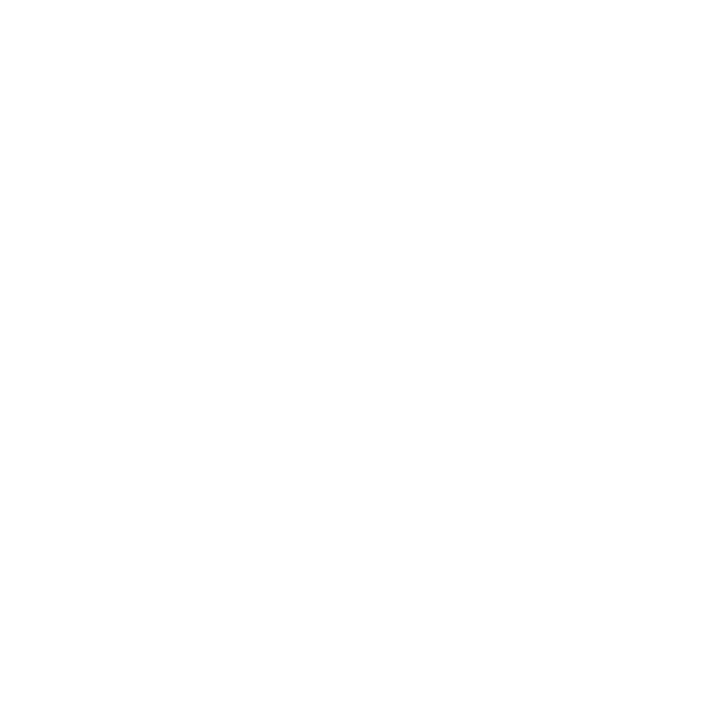

In [244]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
%matplotlib notebook
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [245]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [247]:
df['Date'] = pd.to_datetime(df.Date) 

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null datetime64[ns]
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.0+ MB


## The number of data points in each of your min/max results should be 365 

## For the data having 2005-2014, you need to group the data by the day-month parts of the Date regardless of the year part then find the max and min, temperatures in each group.

In [249]:
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Year'] = df.Date.dt.year
df.sort_values(by = 'Date', inplace=True)

In [250]:
#convert temperature from tenths of degree C to degree C
df['Data_Value']=0.1*df.Data_Value
df.head(10)

,ID,Date,Element,Data_Value,Month,Day,Year
60995,USW00004848,2005-01-01,TMIN,0.0,1,1,2005
17153,USC00207320,2005-01-01,TMAX,15.0,1,1,2005
17155,USC00207320,2005-01-01,TMIN,-1.1,1,1,2005
10079,USW00014833,2005-01-01,TMIN,-4.4,1,1,2005
10073,USW00014833,2005-01-01,TMAX,3.3,1,1,2005
2812,USC00203712,2005-01-01,TMIN,-5.0,1,1,2005
60994,USW00004848,2005-01-01,TMAX,13.3,1,1,2005
39454,USC00205563,2005-01-01,TMAX,2.8,1,1,2005
18049,USW00014853,2005-01-01,TMAX,5.6,1,1,2005
24805,USW00094889,2005-01-01,TMIN,-5.6,1,1,2005


In [251]:
df.tail(10)

,ID,Date,Element,Data_Value,Month,Day,Year
40650,USC00200228,2015-12-31,TMAX,0.0,12,31,2015
40653,USC00200228,2015-12-31,TMIN,-1.1,12,31,2015
32235,USC00207312,2015-12-31,TMAX,0.6,12,31,2015
10639,USC00205050,2015-12-31,TMAX,0.0,12,31,2015
39461,USC00202308,2015-12-31,TMIN,-1.1,12,31,2015
45691,USC00200032,2015-12-31,TMAX,1.1,12,31,2015
10573,USC00205050,2015-12-31,TMIN,-1.7,12,31,2015
21088,USC00208202,2015-12-31,TMAX,0.0,12,31,2015
10253,USC00201250,2015-12-31,TMIN,-0.6,12,31,2015
29410,USC00200230,2015-12-31,TMIN,-1.7,12,31,2015


In [252]:
#leap year 2008 and 2012
df = df[~ df['Date'].isin(['2012-02-29', '2008-02-29'])]
#df_new = df.drop(df.loc[df['Date'].isin(['2012-02-29', '2008-02-29'])].index)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165002 entries, 60995 to 29410
Data columns (total 7 columns):
ID            165002 non-null object
Date          165002 non-null datetime64[ns]
Element       165002 non-null object
Data_Value    165002 non-null float64
Month         165002 non-null int64
Day           165002 non-null int64
Year          165002 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 10.1+ MB


In [254]:
df_2005_to_14 = df[df['Year'] != 2015]
df_2015  = df[df['Year'] == 2015]

In [255]:
df_2005_to_14.tail()

,ID,Date,Element,Data_Value,Month,Day,Year
61837,USC00202308,2014-12-31,TMIN,-10.0,12,31,2014
45478,USC00205563,2014-12-31,TMAX,-2.8,12,31,2014
46667,USC00205451,2014-12-31,TMIN,-11.1,12,31,2014
45477,USC00205563,2014-12-31,TMIN,-11.7,12,31,2014
62784,USC00205822,2014-12-31,TMAX,-2.8,12,31,2014


In [256]:
df_2015.head()

,ID,Date,Element,Data_Value,Month,Day,Year
43095,USW00014833,2015-01-01,TMIN,-8.8,1,1,2015
51805,USC00208972,2015-01-01,TMAX,-6.7,1,1,2015
43140,USC00202308,2015-01-01,TMIN,-10.6,1,1,2015
43653,USC00200228,2015-01-01,TMAX,-5.0,1,1,2015
43652,USC00200228,2015-01-01,TMIN,-8.9,1,1,2015


In [257]:
df_min_max = df_2005_to_14.groupby(['Element','Month', 'Day'])['Data_Value'].agg({'Max_Data_Value': 'max', 'Min_Data_Value': 'min'})
df_min_max

Max_Data_Value  Min_Data_Value
Element Month Day                                
TMAX    1     1              15.6            -9.3
              2              13.9           -10.0
              3              13.3           -11.7
              4              10.6           -10.0
              5              12.8            -5.0
              6              18.9            -8.2
              7              21.7           -18.9
              8              19.4           -19.4
              9              17.8           -17.8
              10             10.0            -5.6
              11             15.6            -6.1
              12             16.1            -6.7
              13             16.7            -6.1
              14             15.0           -11.7
              15              6.7           -13.8
              16              9.4           -18.2
              17             13.3           -17.8
              18             12.2           -11.7
              19             10.6            -8.9
              20             13.3           -11.1
              21             13.3           -12.1
              22             11.7           -13.3
              23             12.8           -13.3
              24             11.7           -14.4
              25             10.0           -11.1
              26              8.9            -9.4
              27              7.8            -9.4
              28             12.2           -16.0
              29             17.8           -15.6
              30             18.3            -8.9
...                           ...             ...
TMIN    12    2              11.7           -13.3
              3              10.0           -10.0
              4              10.6           -12.2
              5               6.1           -15.5
              6               2.2           -18.3
              7               2.8           -19.4
              8               4.4           -20.0
              9               2.8           -18.9
              10              4.4           -17.2
              11              6.1           -16.7
              12              5.6           -21.0
              13              5.0           -17.8
              14              8.3           -16.1
              15              6.7           -16.6
              16              7.8           -22.8
              17              8.3           -22.2
              18              4.4           -19.4
              19              2.8           -16.1
              20              4.4           -16.7
              21              4.4           -19.4
              22              5.6           -20.0
              23              5.6           -20.0
              24              8.9           -16.7
              25              5.6           -16.7
              26              1.7           -15.6
              27              9.4           -13.8
              28              6.1           -16.6
              29              2.2           -15.0
              30              1.7           -14.4
              31              6.7           -15.0

[730 rows x 2 columns]

In [258]:
record_max=df_min_max.loc['TMAX'].Max_Data_Value
record_max

Month  Day
1      1      15.6
       2      13.9
       3      13.3
       4      10.6
       5      12.8
       6      18.9
       7      21.7
       8      19.4
       9      17.8
       10     10.0
       11     15.6
       12     16.1
       13     16.7
       14     15.0
       15      6.7
       16      9.4
       17     13.3
       18     12.2
       19     10.6
       20     13.3
       21     13.3
       22     11.7
       23     12.8
       24     11.7
       25     10.0
       26      8.9
       27      7.8
       28     12.2
       29     17.8
       30     18.3
              ... 
12     2      15.6
       3      18.3
       4      18.3
       5      17.2
       6      12.8
       7       8.3
       8       7.2
       9       8.3
       10     11.1
       11     12.8
       12     13.3
       13     11.1
       14     13.9
       15     15.0
       16     13.9
       17     14.4
       18     15.6
       19     12.2
       20     13.3
       21     15.6
       22     13.3
 

In [259]:
record_min=df_min_max.loc['TMIN'].Min_Data_Value
record_min.head()

Month  Day
1      1     -16.0
       2     -26.7
       3     -26.7
       4     -26.1
       5     -15.0
Name: Min_Data_Value, dtype: float64

In [260]:
df_2015_min_max=df_2015.groupby(['Element','Month', 'Day'])['Data_Value'].agg({'Max_Data_Value2015': 'max', 'Min_Data_Value2015': 'min'})
df_2015_min_max

Max_Data_Value2015  Min_Data_Value2015
Element Month Day                                        
TMAX    1     1                   1.1                -6.7
              2                   3.9                -2.2
              3                   3.9                 0.0
              4                   4.4                 0.0
              5                   2.8                -8.8
              6                   3.3               -11.7
              7                  -6.7               -11.7
              8                  -8.2               -14.4
              9                  -6.6                -9.4
              10                 -7.1               -11.7
              11                  0.6                -6.1
              12                  0.6                -2.1
              13                  0.0               -11.1
              14                 -5.6               -12.1
              15                 -0.5               -10.6
              16                  0.6                -3.3
              17                  7.8                -3.9
              18                  8.3                 3.9
              19                  6.7                 1.1
              20                  3.9                -0.6
              21                  2.2                -2.8
              22                 -0.5                -3.9
              23                  1.1                -3.3
              24                  4.4                -1.1
              25                  3.3                 1.1
              26                  2.8                -4.4
              27                 -0.5                -3.9
              28                  0.6                -3.9
              29                  3.9                -1.7
              30                  2.8                -3.2
...                               ...                 ...
TMIN    12    2                  -0.6                -6.1
              3                   2.2                -7.8
              4                   0.6                -4.3
              5                  -1.1                -5.0
              6                  -1.0                -5.6
              7                  -1.1                -6.7
              8                   2.2                -6.7
              9                   3.3                -3.3
              10                  4.4                -4.4
              11                  6.7                 0.0
              12                 10.0                 2.8
              13                 14.4                 6.7
              14                 14.4                 6.1
              15                  6.7                 3.9
              16                  6.7                 0.6
              17                  2.2                -1.1
              18                  0.0                -5.0
              19                 -2.8                -6.7
              20                 -4.4                -9.4
              21                  5.6                -8.3
              22                  6.7                 0.6
              23                  5.0                 0.0
              24                  6.7                 0.0
              25                  6.1                -3.2
              26                  3.9                -3.9
              27                  3.3                -0.6
              28                  0.6                -3.9
              29                  2.8                -3.9
              30                  1.7                -2.2
              31                  0.0                -5.6

[730 rows x 2 columns]

In [261]:
record_2015_max=df_2015_min_max.loc['TMAX'].Max_Data_Value2015
record_2015_min=df_2015_min_max.loc['TMIN'].Min_Data_Value2015
record_2015_min

Month  Day
1      1     -13.3
       2     -12.2
       3      -6.7
       4      -8.8
       5     -15.5
       6     -18.2
       7     -18.2
       8     -21.1
       9     -20.6
       10    -20.6
       11    -20.0
       12    -11.7
       13    -21.6
       14    -24.4
       15    -20.0
       16    -16.7
       17    -11.7
       18    -10.0
       19     -1.7
       20     -3.3
       21     -6.1
       22     -6.7
       23    -10.0
       24     -6.1
       25     -8.8
       26    -15.0
       27    -16.1
       28    -17.2
       29    -16.7
       30    -14.3
              ... 
12     2      -6.1
       3      -7.8
       4      -4.3
       5      -5.0
       6      -5.6
       7      -6.7
       8      -6.7
       9      -3.3
       10     -4.4
       11      0.0
       12      2.8
       13      6.7
       14      6.1
       15      3.9
       16      0.6
       17     -1.1
       18     -5.0
       19     -6.7
       20     -9.4
       21     -8.3
       22      0.6
 

In [262]:
print(len(record_2015_max), len(record_2015_min),len(record_max), len(record_min))

365 365 365 365


<IPython.core.display.Javascript object>


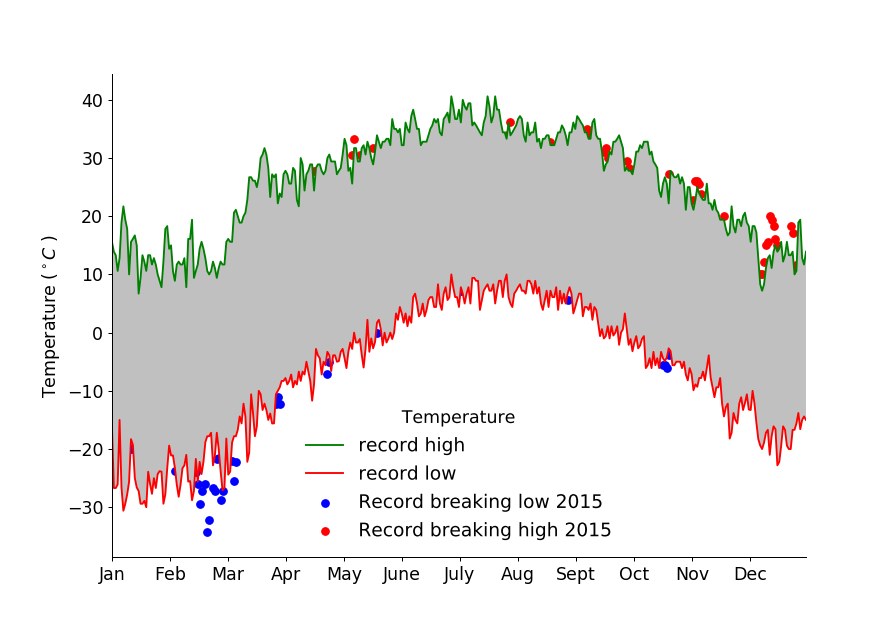

In [304]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(record_max)),record_max, '-g', label="record high") 
plt.plot(np.arange(len(record_max)),record_min, '-r',label="record low")
plt.xlim(0, 364)
plt.ylabel('Temperature ($^\circ C$ )',size=14)

In [305]:
plt.scatter(np.where(record_2015_min < record_min.values),  record_2015_min[record_2015_min < record_min].values,c='b',label='Record breaking low 2015')
plt.scatter(np.where(record_2015_max > record_max.values),  record_2015_max[record_2015_max > record_max].values,c='r',label='Record breaking high 2015')

In [306]:
plt.xticks(np.linspace(0,365,13)[:-1], ('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'),size=14)
plt.yticks(size=14)
plt.gca().fill_between(np.arange(0,365),record_min, record_max, facecolor='silver')
plt.legend(loc=8, frameon=False, title='Temperature', fontsize=15)

In [307]:
plt.show()

<IPython.core.display.Javascript object>


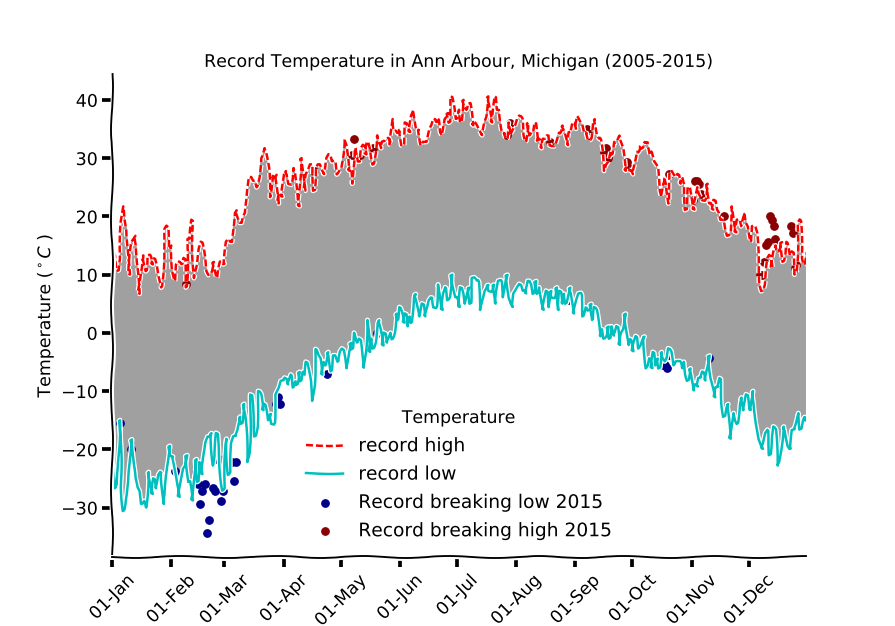

In [315]:
with plt.xkcd():
    plt.figure(figsize=(10,7))
    plt.plot(np.arange(len(record_max)),record_max, '--r', label="record high") 
    plt.plot(np.arange(len(record_max)),record_min, '-c',label="record low")
    plt.xlim(0, 364)
    plt.ylabel('Temperature ($^\circ C$ )',size=14)
    tick = [0,31,59,90,120,151,181,212,243,273,304,334]
    plt.xticks(tick, ['01-Jan','01-Feb', '01-Mar','01-Apr','01-May','01-Jun','01-Jul','01-Aug','01-Sep','01-Oct','01-Nov','01-Dec'], rotation = 45,size=14)
    plt.yticks(size=14)
    plt.gca().fill_between(np.arange(0,365),record_min, record_max, facecolor='grey',alpha=0.75)
    
    plt.scatter(np.where(record_2015_min < record_min.values),  record_2015_min[record_2015_min < record_min].values,c='darkblue',label='Record breaking low 2015')
    plt.scatter(np.where(record_2015_max > record_max.values),  record_2015_max[record_2015_max > record_max].values,c='darkred',label='Record breaking high 2015')
    
    plt.legend(loc=8, frameon=False, title='Temperature', fontsize=15)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title('Record Temperature in Ann Arbour, Michigan (2005-2015)',size=14)
plt.show()